# Forest Cover Type Prediction - Ojas Agarwal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
%matplotlib inline


dtrain=pd.read_csv('train.csv')
dtest=pd.read_csv('test.csv')

pd.set_option('display.max_columns', None)
dtrain.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

All count is 15120.This implies no missingvalues.

In [5]:
col_list=list(dtrain.columns.values) 
data=dtrain.append(dtest,True,True)
data=data[col_list]

Creating a whole new dataframe which has all the training and testing data.
Append function gives the new dataframe with columns arranged in ascending order of their name, 
so by using data=data[col_list] we arrange the columns in the given order. 


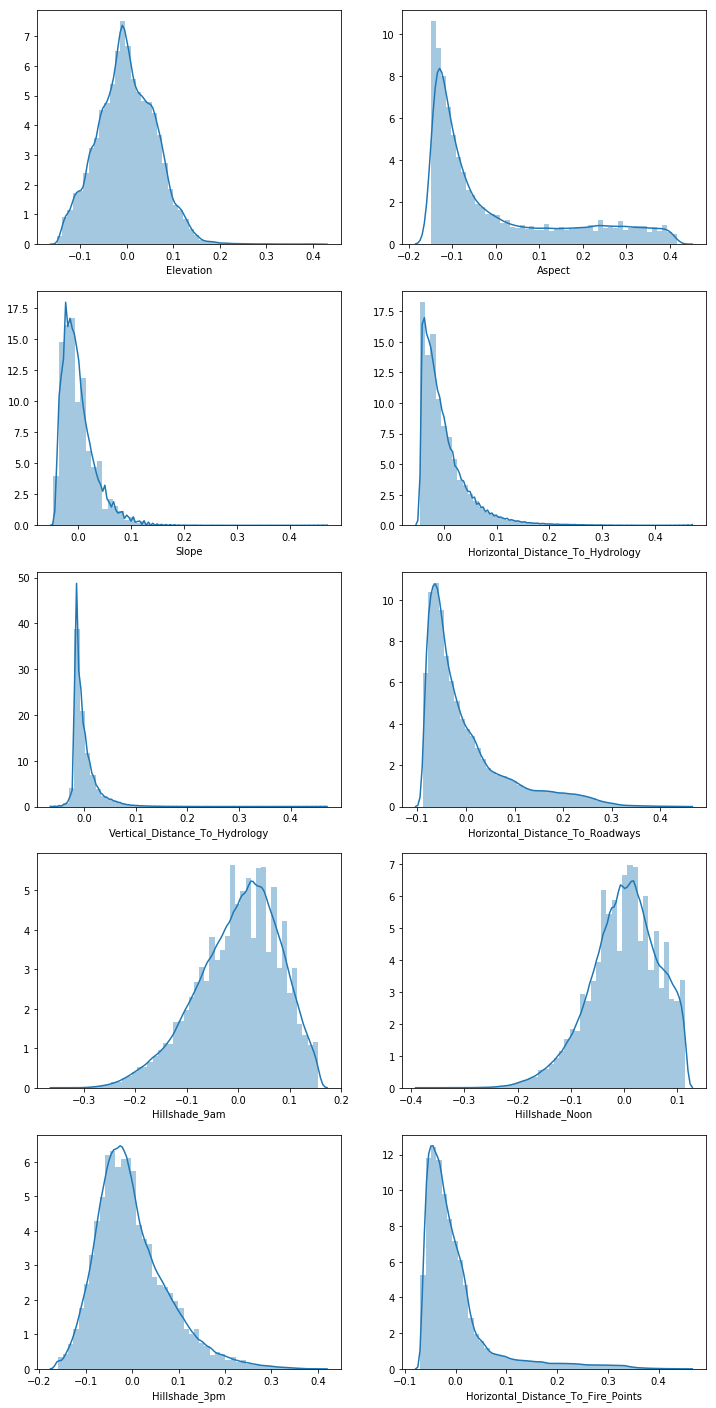

In [58]:
fig,axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12,25)

j,k=0,0
for i in range(1,11):
    data[col_list[i]]=np.exp((data[col_list[i]]-np.mean(data[col_list[i]]))/np.max(np.abs(data[col_list[i]])))
    sn.distplot(data[col_list[i]],ax=axes[j][k])
    k+=1
    if k==2:
        j+=1
        k=0


Adjusting mean of numerical columns to 0 and applying feature scaling for better results and also taking exponents for the distribution so that they follow the Normal Distribution

In [7]:
print(data.dtypes)

Id                                      int64
Elevation                               int64
Aspect                                  int64
Slope                                   int64
Horizontal_Distance_To_Hydrology        int64
Vertical_Distance_To_Hydrology          int64
Horizontal_Distance_To_Roadways         int64
Hillshade_9am                           int64
Hillshade_Noon                          int64
Hillshade_3pm                           int64
Horizontal_Distance_To_Fire_Points      int64
Wilderness_Area1                        int64
Wilderness_Area2                        int64
Wilderness_Area3                        int64
Wilderness_Area4                        int64
Soil_Type1                              int64
Soil_Type2                              int64
Soil_Type3                              int64
Soil_Type4                              int64
Soil_Type5                              int64
Soil_Type6                              int64
Soil_Type7                        

In [61]:
dtrain=data[pd.notnull(data['Cover_Type'])].sort_values(by=['Id'])
dtest=data[~pd.notnull(data['Cover_Type'])].sort_values(by=['Id'])
print dtrain.shape
print dtest.shape

(15120, 56)
(565892, 56)


Getting the training and testing data back from the complete dataframe after feature scaling.

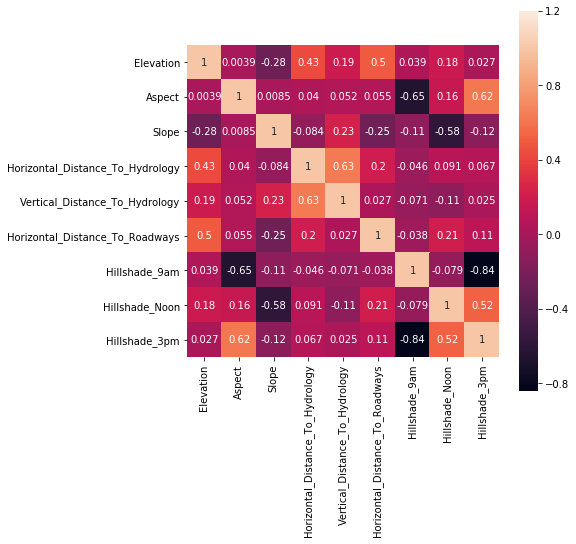

In [62]:
corrMatt=dtrain[['Elevation','Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm' ,'Cover_Type']].corr()
fig,ax=plt.subplots()
fig.set_size_inches(7,7)
sn.heatmap(corrMatt,vmax=1.2,square=True,annot=True)

Plotting the correlation matrix to see if the correation between features.

[Text(0.5,1,u'Horizontal_Distance_To_Roadways')]

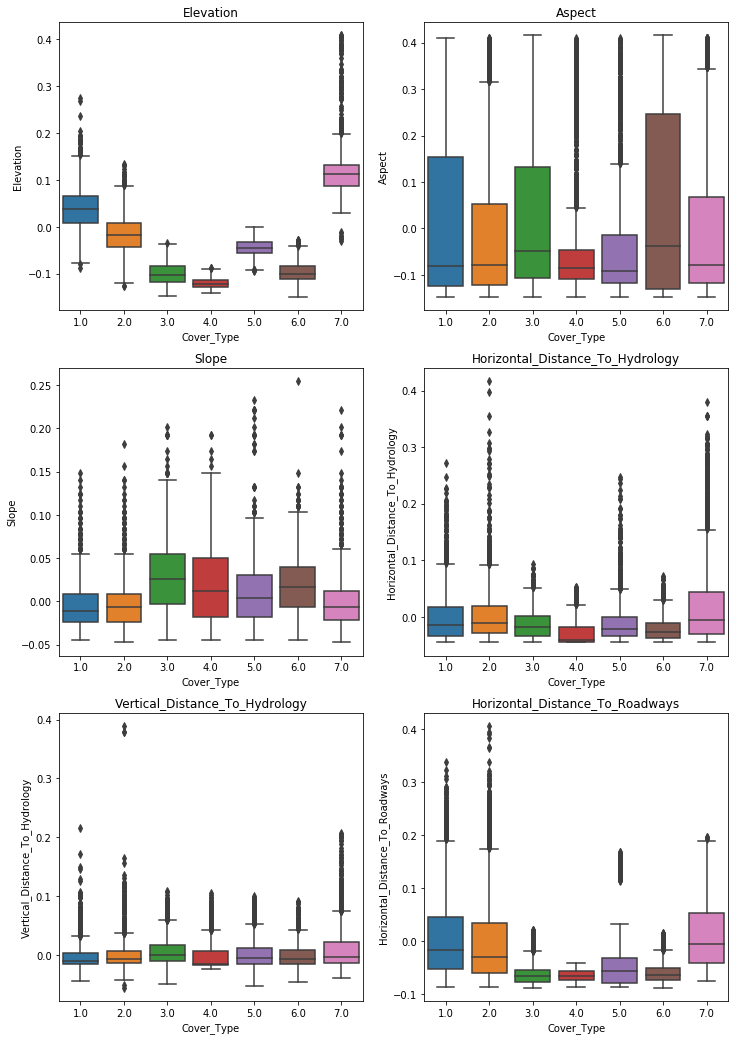

In [63]:
fig,axis=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,18)
sn.boxplot(x='Cover_Type',y='Elevation',data=dtrain,ax=axis[0][0])
sn.boxplot(x='Cover_Type',y='Aspect',data=dtrain,ax=axis[0][1])
sn.boxplot(x='Cover_Type',y='Slope',data=dtrain,ax=axis[1][0])
sn.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Hydrology',data=dtrain,ax=axis[1][1])
sn.boxplot(x='Cover_Type',y='Vertical_Distance_To_Hydrology',data=dtrain,ax=axis[2][0])
sn.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Roadways',data=dtrain,ax=axis[2][1])

axis[0][0].set(title="Elevation")
axis[0][1].set(title="Aspect")
axis[1][0].set(title="Slope")
axis[1][1].set(title="Horizontal_Distance_To_Hydrology")
axis[2][0].set(title="Vertical_Distance_To_Hydrology")
axis[2][1].set(title="Horizontal_Distance_To_Roadways")
 

In [64]:
Id=dtest['Id']
y_val=dtrain['Cover_Type']
drop_list=['Id','Cover_Type']
dtrain.drop(drop_list,inplace=True,axis=1)
dtest.drop(drop_list,inplace=True,axis=1)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(dtrain,y_val,test_size=0.3,random_state=7)

Splitting test and train data to train the model for predictions.

## Random Forest

In [66]:
rfc=RandomForestClassifier(n_estimators=500,random_state=7)
rfc.fit(x_train,y_train)
pred_t=rfc.predict(x_test)
scr=rfc.score(x_test,y_test)
print scr


0.856040564374


## Gradient Boost Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,random_state=7)
gbc.fit(x_train,y_train)
pred_g=gbc.predict(x_test)
scr2=gbc.score(x_test,y_test)
print scr2


0.766093474427


In [68]:
pred_rf=rfc.predict(dtest)
output=pd.DataFrame({
    'Id': Id,
    'Cover_Type': pred_rf
    })
output=output[['Id','Cover_Type']]
print output.head()
#output.to_csv('rfc_500.csv',index=False)

          Id  Cover_Type
15120  15121         2.0
15121  15122         1.0
15122  15123         1.0
15123  15124         1.0
15124  15125         1.0


Choosing the Random forest Classifier as it has better performance over the test set.
